In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR ='images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print (train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm
from PIL import Image

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Correct usage of color_mode
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [19]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [20]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [21]:
model = Sequential()
#Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=x_train, y= y_train, batch_size= 128, epochs= 100, validation_data= (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 151s 659ms/step - accuracy: 0.2315 - loss: 1.8419 - val_accuracy: 0.2580 - val_loss: 1.7884
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 158s 699ms/step - accuracy: 0.2669 - loss: 1.7696 - val_accuracy: 0.3504 - val_loss: 1.6490
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 168s 745ms/step - accuracy: 0.3658 - loss: 1.6126 - val_accuracy: 0.4621 - val_loss: 1.4235
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 704ms/step - accuracy: 0.4191 - loss: 1.4900 - val_accuracy: 0.4912 - val_loss: 1.3635
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 159s 702ms/step - accuracy: 0.4475 - loss: 1.4349 - val_accuracy: 0.5127 - val_loss: 1.2867
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 156s 689ms/step - accuracy: 0.4683 - loss: 1.3762 - val_accuracy: 0.5267 - val_loss: 1.2532
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 677ms/step - accuracy: 0.4891 - loss: 1.3327 - val_accuracy: 0.5392 - val_loss: 1.2204
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 153s 679ms/step - accuracy: 

In [40]:
# After training your model
from keras.models import model_from_json

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("facialemotiondetector.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights in the correct format
model.save_weights("facialemotiondetector.weights.h5")  # Updated filename

In [41]:
# Load the model architecture from the JSON file
with open("facialemotiondetector.json", "r") as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Load the model weights from the updated H5 file
model.load_weights("facialemotiondetector.weights.h5")  # Updated filename

# Recompile the model with the optimizer and loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model loaded successfully.")

Model loaded successfully.


In [42]:
# labeling the 
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [43]:
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Original image: images/train/sad/89.jpg
Model prediction: sad


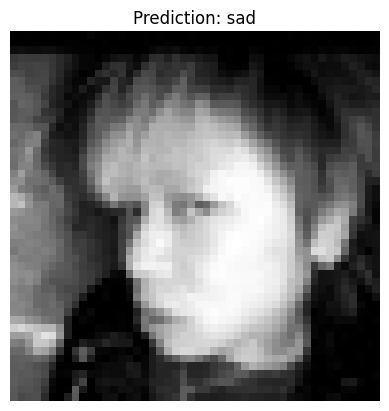

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Original image: images/train/happy/118.jpg
Model prediction: happy


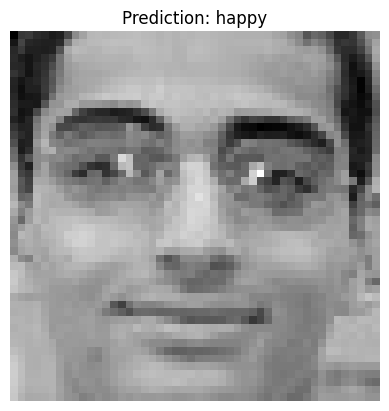

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Original image: images/train/angry/169.jpg
Model prediction: neutral


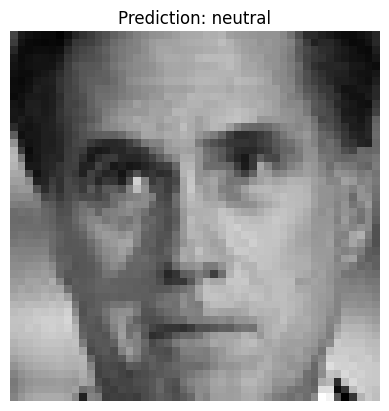

In [44]:
# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale')  # Use 'color_mode' instead of 'grayscale'
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0  # Normalize pixel values

# Function to automate predictions for multiple images
def predict_emotion(images, model, labels):
    for image_path in images:
        img = preprocess_image(image_path)
        pred = model.predict(img)
        pred_label = labels[pred.argmax()]
        
        # Display the original image and prediction
        print(f"Original image: {image_path}")
        print(f"Model prediction: {pred_label}")
        plt.imshow(img.reshape(48, 48), cmap='gray')
        plt.title(f"Prediction: {pred_label}")
        plt.axis('off')
        plt.show()

# List of image file paths
image_paths = [
    'images/train/sad/89.jpg',
    'images/train/happy/118.jpg',
    'images/train/angry/169.jpg'
]

# Automate the prediction task for multiple images
predict_emotion(image_paths, model, label)